# Exploratory Data Analysis (EDA)

This notebook explores the processed movie dataset to understand the factors distinguishing Hits from Flops.

## Goals
1. Analyze Target Distribution (Hit vs Flop)
2. Analyze Numeric Features (Budget, Runtime)
3. Analyze Categorical Features (Genres, Production Companies)
4. Identify Correlations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

## 1. Load Data

In [2]:
# Load processed data
df = pd.read_csv('../data/processed/train_processed.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (2596, 49)


,budget,id,original_language,release_date,runtime,cast,crew,label,release_month,Action,...,company_United Artists,company_DreamWorks SKG,company_Miramax Films,company_Village Roadshow Pictures,company_Dune Entertainment,company_Regency Enterprises,company_Amblin Entertainment,company_TriStar Pictures,company_Working Title Films,log_budget
0,237000000,19995,en,2009-12-10,162.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Hit,12,1.0,...,0,0,0,0,1,0,0,0,0,19.283571
1,300000000,285,en,2007-05-19,169.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Hit,5,1.0,...,0,0,0,0,0,0,0,0,0,19.519293
2,245000000,206647,en,2015-10-26,148.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Hit,10,1.0,...,0,0,0,0,0,0,0,0,0,19.316769
3,250000000,49026,en,2012-07-16,165.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",Hit,7,1.0,...,0,0,0,0,0,0,0,0,0,19.336971
4,258000000,559,en,2007-05-01,139.0,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",Hit,5,1.0,...,0,0,0,0,0,0,0,0,0,19.368470


## 2. Target Distribution

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7548\50525756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='viridis')


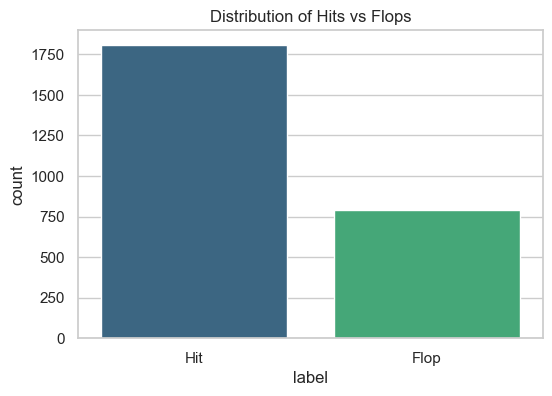

label
Hit     0.696456
Flop    0.303544
Name: proportion, dtype: float64


In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Distribution of Hits vs Flops')
plt.show()

print(df['label'].value_counts(normalize=True))

## 3. Numeric Features: Budget & Runtime

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7548\1753443272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='log_budget', data=df, ax=axes[0], palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7548\1753443272.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='runtime', data=df, ax=axes[1], palette='viridis')


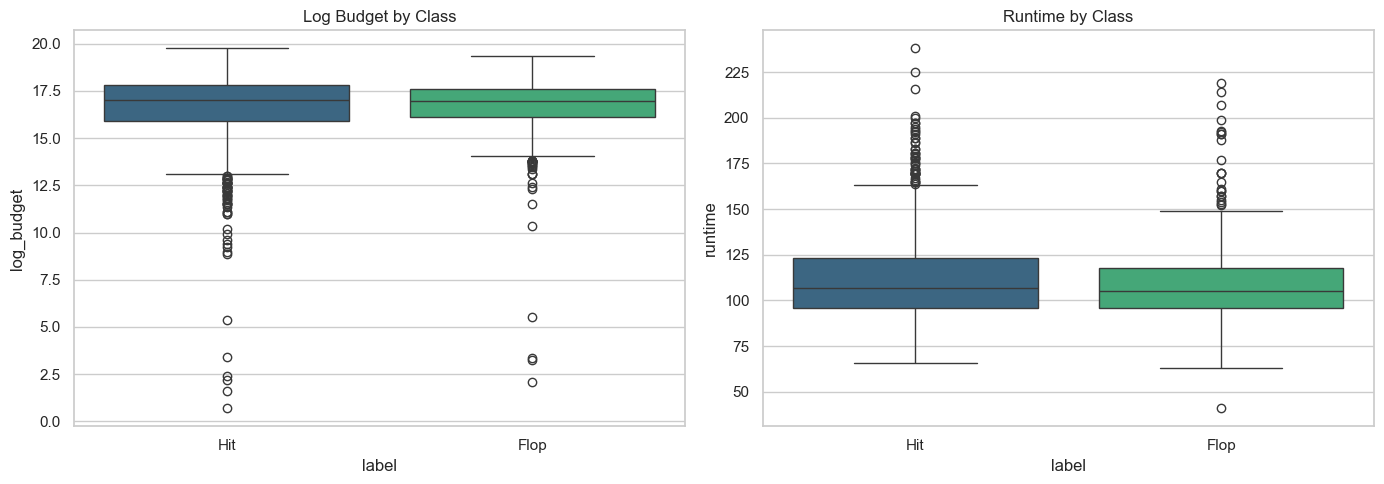

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Log Budget vs Label
sns.boxplot(x='label', y='log_budget', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Log Budget by Class')

# Runtime vs Label
sns.boxplot(x='label', y='runtime', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Runtime by Class')

plt.tight_layout()
plt.show()

## 4. Categorical Analysis: Genres

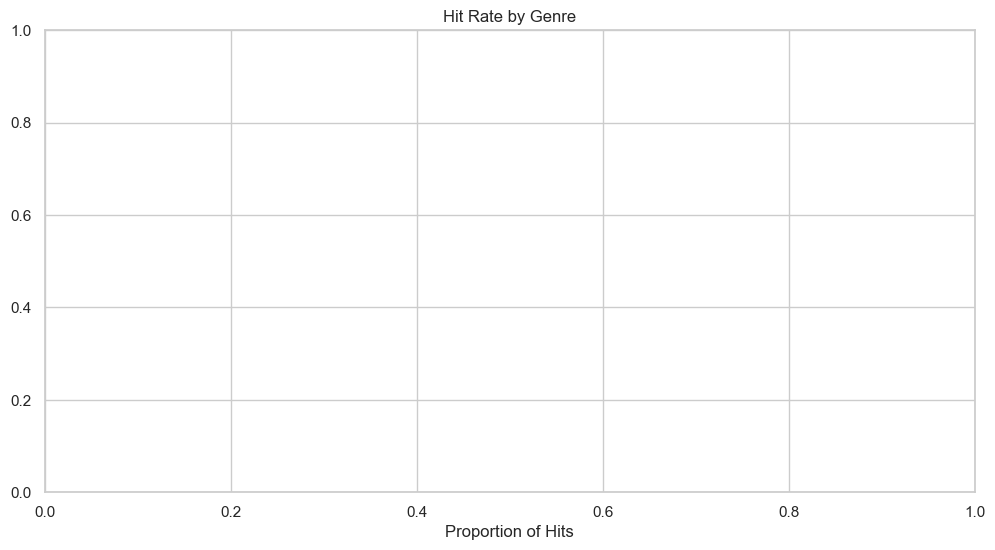

In [5]:
# Identify genre columns (assuming they start with 'genre_')
genre_cols = [c for c in df.columns if c.startswith('genre_')]

# Calculate Hit Rate per Genre
genre_hit_rates = {}
for genre in genre_cols:
    genre_name = genre.replace('genre_', '')
    subset = df[df[genre] == 1]
    if len(subset) > 0:
        hit_rate = (subset['label'] == 'Hit').mean()
        genre_hit_rates[genre_name] = hit_rate

genre_df = pd.DataFrame(list(genre_hit_rates.items()), columns=['Genre', 'Hit_Rate'])
genre_df = genre_df.sort_values('Hit_Rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Hit_Rate', y='Genre', data=genre_df, palette='coolwarm')
plt.title('Hit Rate by Genre')
plt.xlabel('Proportion of Hits')
plt.show()

## 5. Release Month Analysis

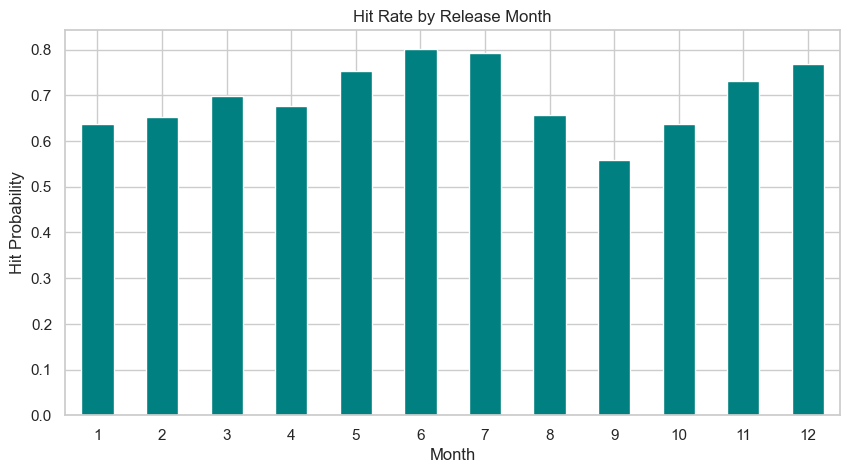

In [6]:
plt.figure(figsize=(10, 5))
# Calculate Hit Rate per Month
month_stats = df.groupby('release_month')['label'].value_counts(normalize=True).unstack().fillna(0)

if 'Hit' in month_stats.columns:
    month_stats['Hit'].plot(kind='bar', color='teal')
    plt.title('Hit Rate by Release Month')
    plt.ylabel('Hit Probability')
    plt.xlabel('Month')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Not enough data to plot Hit rate by month")